In [335]:
import numpy as np
import torch
import matplotlib.pyplot as plt

from os import getcwd

getcwd()

#from modules.flow import UnconditionalOrthogonalSylvesterFlow

%config InlineBackend.figure_formats = ['svg']

In [499]:
torch.manual_seed(42)

In [500]:
key_point_1 = torch.rand(1, 10) - 0.5
key_point_2 = torch.rand(1, 10) - 0.5
key_point_3 = torch.rand(1, 10) - 0.5
key_point_4 = torch.rand(1, 10) - 0.5
key_point_5 = torch.rand(1, 10) - 0.5
key_point_6 = torch.rand(1, 10) - 0.5
key_point_7 = torch.rand(1, 10) - 0.5
key_point_8 = torch.rand(1, 10) - 0.5
key_point_9 = torch.rand(1, 10) - 0.5
key_point_10 = torch.rand(1, 10) - 0.5

In [531]:
torch.manual_seed(42)

In [532]:
def unnormalized_density_two_dims(x, dim1, dim2):
    return torch.exp(- torch.linalg.vector_norm(x - key_point_1[:, [dim1, dim2]], dim=1) ** 0.5) +\
           torch.exp(- torch.linalg.vector_norm(x - key_point_2[:, [dim1, dim2]], dim=1) ** 0.5) +\
           torch.exp(- torch.linalg.vector_norm(x - key_point_3[:, [dim1, dim2]], dim=1) ** 0.5)

In [533]:
def log_unnormalized_density_two_dims(x, dim1, dim2):
    variance = 0.04
    return torch.logsumexp(torch.hstack([
        - torch.linalg.vector_norm(x - key_point_1[:, [dim1, dim2]], dim=1).pow(2).div(variance).view(-1, 1),
        - torch.linalg.vector_norm(x - key_point_2[:, [dim1, dim2]], dim=1).pow(2).div(variance).view(-1, 1),
        - torch.linalg.vector_norm(x - key_point_3[:, [dim1, dim2]], dim=1).pow(2).div(variance).view(-1, 1),
        - torch.linalg.vector_norm(x - key_point_4[:, [dim1, dim2]], dim=1).pow(2).div(variance).view(-1, 1),
        - torch.linalg.vector_norm(x - key_point_5[:, [dim1, dim2]], dim=1).pow(2).div(variance).view(-1, 1),
        - torch.linalg.vector_norm(x - key_point_6[:, [dim1, dim2]], dim=1).pow(2).div(variance).view(-1, 1),
        - torch.linalg.vector_norm(x - key_point_7[:, [dim1, dim2]], dim=1).pow(2).div(variance).view(-1, 1),
        - torch.linalg.vector_norm(x - key_point_8[:, [dim1, dim2]], dim=1).pow(2).div(variance).view(-1, 1),
        - torch.linalg.vector_norm(x - key_point_9[:, [dim1, dim2]], dim=1).pow(2).div(variance).view(-1, 1),
        - torch.linalg.vector_norm(x - key_point_10[:, [dim1, dim2]], dim=1).pow(2).div(variance).view(-1, 1)
        
    ]), dim=1)

In [534]:
xs = torch.linspace(-1, 1, 100)
ys = torch.linspace(-1, 1, 100)
xxs, yys = torch.meshgrid(xs, ys)
xxsyys = torch.hstack([xxs.reshape(-1, 1), yys.reshape(-1, 1)])

In [535]:
ps.max(), ps.min()

(tensor(0.9645), tensor(-31.7801))

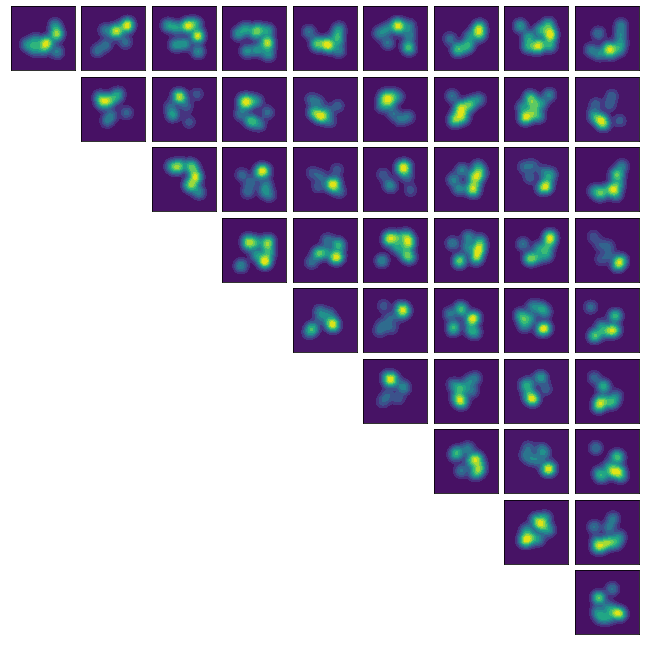

In [536]:
fig = plt.figure(figsize=(10, 10), )
for i in range(1, 10+1):
    for j in range(1, 10+1):
        if i < j:
            
            fig.add_subplot(10, 10, (i-1) * 10 + j)
            
            ps = log_unnormalized_density_two_dims(xxsyys, i-1, j-1).view(100, 100)
            
            plt.contourf(xxs, yys, torch.exp(ps), levels=10)
            
            plt.xlim(-1, 1)
            plt.ylim(-1, 1)
            #plt.axis("off") 
            plt.xticks([])
            plt.yticks([])
            plt.gca().set_aspect("equal")
        
plt.tight_layout() 
fig.subplots_adjust(wspace=0.1, hspace=0.1)

In [462]:
q = GMM2(D=10, K=100)
opt = optim.Adam(q.parameters(), lr=1e-2)

start = time.perf_counter()

samples_kls = []

for i in range(1, 10001):
    
    samples_from_q_K = q.sample(n=2000)
    log_probs = q.log_prob(samples_from_q_K)
    sample_kl = (log_probs - log_unnormalized_density(samples_from_q_K)).mean()
    
    samples_kls.append(float(sample_kl))
    
    opt.zero_grad()
    sample_kl.backward(retain_graph=True)
    opt.step()

    if i % 100 == 0:
        
        print(i, float(sample_kl))
        
end = time.perf_counter()
end - start

NameError: name 'GMM2' is not defined

In [284]:
def transform(z, u, w, b):
    """
    This function implements Equation 10, 11 and 12 in the paper.

    Input shapes:

    z: (D)
    u: (D)
    w: (D)
    b: (1)

    Output shapes:

    (D+1)
    """

    pre_activation = torch.dot(w, z) + b

    new_z = z + u * torch.tanh(pre_activation)

    phi_z = dtanh(pre_activation) * w
    log_abs_det = torch.abs(1 + torch.dot(u, phi_z)).unsqueeze(0)
    
    return torch.cat([new_z, log_abs_det])

In [285]:
def dtanh(x):
    return 1 - (torch.tanh(x)) ** 2

In [286]:
z = torch.randn(10)
u = torch.randn(10)
w = torch.randn(10)
b = torch.randn(1)

transform(z, u, w, b)

tensor([ 0.6791, -0.9474,  0.8293,  0.9404, -0.6889, -0.1560, -3.6236,  1.1852,
         0.0288,  0.0977,  1.0005])

In [287]:
batch_transform = torch.vmap(
    torch.vmap(transform, (0, None, None, None), 0), (0, 0, 0, 0), 0
)

In [288]:
μ = torch.randn(64, 10)
σ = torch.ones(64, 10)
z = torch.randn(64, 50, 32, 10)
u = torch.randn(64, 50, 10)
w = torch.randn(64, 50, 10)
b = torch.randn(64, 50, 1)

In [289]:
import torch.distributions as tdist

In [290]:
def batch_sample_from_flow(μ, σ, u, w, b, num_samples, return_z_from_each_layer=False):
    """
    
    """

    bs, K, D = u.shape

    # (you can't do vmap for sampling from distributions)
    q0 = tdist.Independent(tdist.Normal(loc=μ, scale=σ), reinterpreted_batch_ndims=1)  
    
    z = q0.rsample(sample_shape=torch.Size([num_samples]))  # (num_samples, bs, D)
    log_prob = q0.log_prob(z)  # (num_samples, bs)
    
    z = z.transpose(0, 1)  # (bs, num_samples, D)
    log_prob = log_prob.T  # (bs, num_samples)
    
    z_from_each_layer = torch.zeros(bs, K+1, num_samples, D)
    z_from_each_layer[:, 0, :, :] = z
  
    for k in range(K):
        
        out = batch_transform(
            z, u[:, k, :], w[:, k, :], b[:, k, :]
        )
        
        z, logabsdet = out[:, :, :-1], out[:, :, -1]
        
        log_prob -= logabsdet
        z_from_each_layer[:, k+1, :, :] = z
    
    if return_z_from_each_layer:
        return z_from_each_layer
    else:
        return z, log_prob


In [293]:
batch_sample_from_flow(μ, σ, u, w, b, num_samples=32)[1].shape

torch.Size([64, 32])

In [296]:
torch.randn(64, 32, 16) / torch.randn(64, 32)

RuntimeError: The size of tensor a (16) must match the size of tensor b (32) at non-singleton dimension 2

In [307]:
import torch.nn as nn
def m(x):
    return -1 + nn.functional.softplus(x)

In [308]:
def compute_uhat(u, w):
    w_dot_u = torch.dot(u, w)
    uhat = u + (m(w_dot_u + 0.5413) - w_dot_u) * w / w.pow(2).sum()
    return uhat


batch_compute_uhat = torch.vmap(
    torch.vmap(compute_uhat, (0, 0), 0), (0, 0), 0
)

In [310]:
batch_compute_uhat(torch.randn(64, 50, 10), torch.randn(64, 50, 10)).shape

torch.Size([64, 50, 10])

In [324]:
torch.randn(())

tensor(-0.3248)

In [325]:
torch.randn(6) * torch.randn(1)

tensor([-0.5017,  0.2869,  2.1951,  1.6517,  1.0734, -0.6215])

In [334]:
x = torch.randn(64, 10)
div = 0.2

torch.hstack([
    - torch.linalg.vector_norm(x - key_point_1, dim=1).div(div).pow(2).view(-1, 1),
    - torch.linalg.vector_norm(x - key_point_2, dim=1).div(div).pow(2).view(-1, 1),
    - torch.linalg.vector_norm(x - key_point_3, dim=1).div(div).pow(2).view(-1, 1),
    - torch.linalg.vector_norm(x - key_point_4, dim=1).div(div).pow(2).view(-1, 1),
    - torch.linalg.vector_norm(x - key_point_5, dim=1).div(div).pow(2).view(-1, 1),
    - torch.linalg.vector_norm(x - key_point_6, dim=1).div(div).pow(2).view(-1, 1),
    - torch.linalg.vector_norm(x - key_point_7, dim=1).div(div).pow(2).view(-1, 1),
    - torch.linalg.vector_norm(x - key_point_8, dim=1).div(div).pow(2).view(-1, 1),
    - torch.linalg.vector_norm(x - key_point_9, dim=1).div(div).pow(2).view(-1, 1),
    - torch.linalg.vector_norm(x - key_point_10, dim=1).div(div).pow(2).view(-1, 1)
]).shape

torch.Size([64, 10])

In [333]:
torch.hstack([torch.randn(1), torch.randn(1)])

tensor([1.7056, 0.1374])

In [544]:
def construct_householder(vs):
    
    num_vs, v_dim = vs.shape
    
    I = torch.eye(v_dim, v_dim)
    
    P = I
    
    for i in range(num_vs):
        
        v = vs[i].view(-1, 1)
        v = v / torch.linalg.vector_norm(v)

        P = (I - 2 * v @ v.T) @ P
        
    return P

In [545]:
construct_householder(torch.randn(5, 10)).shape

torch.Size([10, 10])

In [551]:
batch_construct_householder = torch.vmap(torch.vmap(construct_householder, (0, ), 0), (0, ), 0)

In [553]:
batch_construct_householder(torch.randn(64, 32, 5, 10)).shape

torch.Size([64, 32, 10, 10])

In [557]:
a = batch_construct_householder(torch.randn(64, 32, 5, 10))[1][2]
a.T @ a

tensor([[ 1.0000e+00, -3.7367e-08, -2.2709e-08, -2.7099e-08,  3.1113e-08,
         -4.5910e-08,  5.4812e-08,  6.9560e-08,  5.7424e-08,  2.3762e-08],
        [-3.7367e-08,  1.0000e+00,  4.3623e-08, -4.2204e-08, -9.2274e-08,
          1.0015e-07,  4.4376e-08, -1.7724e-07, -6.6625e-08,  3.0246e-11],
        [-2.2709e-08,  4.3623e-08,  1.0000e+00, -2.4347e-08, -2.8066e-08,
          6.4221e-08, -1.8956e-08,  2.5026e-08, -2.0839e-08, -9.9462e-09],
        [-2.7099e-08, -4.2204e-08, -2.4347e-08,  1.0000e+00, -9.6274e-09,
         -9.7531e-08, -2.3495e-08, -1.3098e-08,  1.1365e-07, -2.3471e-09],
        [ 3.1113e-08, -9.2274e-08, -2.8066e-08, -9.6274e-09,  1.0000e+00,
         -1.8203e-09, -1.3008e-07,  6.3924e-08,  6.2718e-08,  3.6027e-08],
        [-4.5910e-08,  1.0015e-07,  6.4221e-08, -9.7531e-08, -1.8203e-09,
          1.0000e+00,  1.9436e-08, -5.2589e-08, -2.3783e-08, -2.9074e-08],
        [ 5.4812e-08,  4.4376e-08, -1.8956e-08, -2.3495e-08, -1.3008e-07,
          1.9436e-08,  1.0000e+0

tensor([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35,
        37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63])

In [592]:
a = torch.eye(10).reshape(1, 1, 10, 10).repeat(1, 64, 1, 1)
a[0, torch.arange(1, 64, 2)] = a[0, torch.arange(1, 64, 2)][0, :, torch.arange(10 - 1, -1, -1).long()]
a[0][2]

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [593]:
a[0, torch.arange(1, 64, 2), ]

IndexError: shape mismatch: indexing tensors could not be broadcast together with shapes [32], [8]